# Automatic feature selection for LDA as regression
## Implement Orthogonal Matching Pursuit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [2]:
def omp_regression(X, y, T):
    
    # Initialization
    N, D = X.shape
    beta = np.zeros((D, T))
    r = y.copy()
    A = []
    B = np.arange(1, D+1)
    solutions = np.zeros((D, T))

    # Iteration
    for t in range(T):
        # 1.
        j = np.argmax(np.abs(X.T @ r))
        
        # 2.
        A.append(j)
        B = B[B!=j]
        
        # 3.
        active_X = X[:, A]

        # 4.
        beta = np.linalg.lstsq(active_X, y, rcond=None)[0]

        solutions[A, t] = beta.flatten()
        r = y - active_X @ beta

    return solutions

## Classifcation with sparse LDA

In [3]:
digits = load_digits()

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

mask = np.logical_or(target == 3,target == 9)

X_all = data[mask]
y_all = target[mask]

y_all[y_all == 3] = 1
y_all[y_all == 9] = -1

X_train , X_test , y_train , y_test =\
    model_selection.train_test_split(X_all, y_all, test_size = 0.4, random_state = 0)

In [4]:
T = 100
sol = omp_regression(X_train, y_train, T)

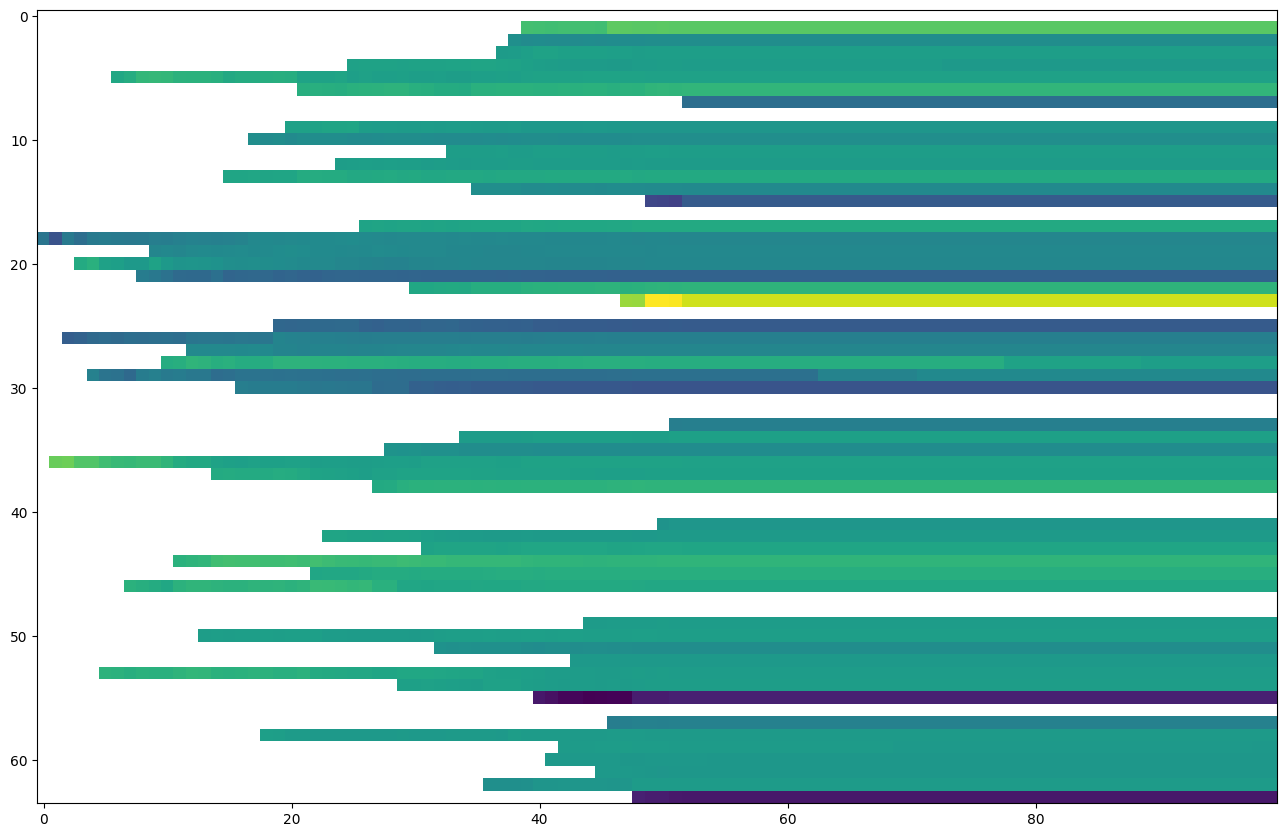

In [5]:
plt.figure(figsize=(16,50))
plot_sol = sol.copy()
plot_sol[sol == 0] = np.nan
plt.imshow(plot_sol)

This image shows us the output of omp_regression(). <br>
The x-axis represents the iteration t and the y-axis the values for the pixels in the images. <br>
We can learn from this which pixels get activated and which are considered the most important pixels.

In [6]:
error_rate = []
for j in range(T):
    res = []
    test = sol.T[j].T
    
    for i in range(len(X_test)):
        r = test @ X_test[i]
        if r > 0: r = 1
        if r < 0: r = -1
        res.append(r)
        
    error_rate.append(1-sum(res == y_test)/len(y_test))

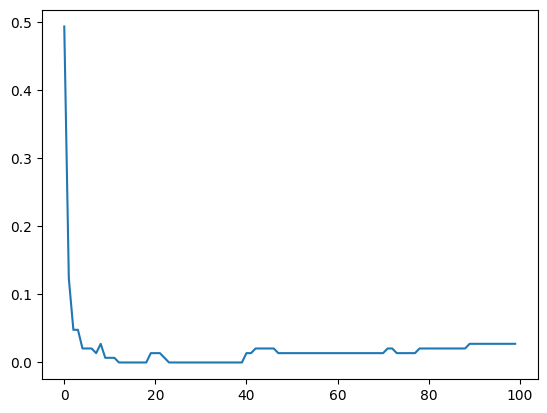

In [7]:
plt.plot(np.arange(0,len(error_rate)), error_rate)

Here we can see the error rate over the number of iterations. <br>
We can see, that we actually get the best predictions between ~15 and 40 iterations.

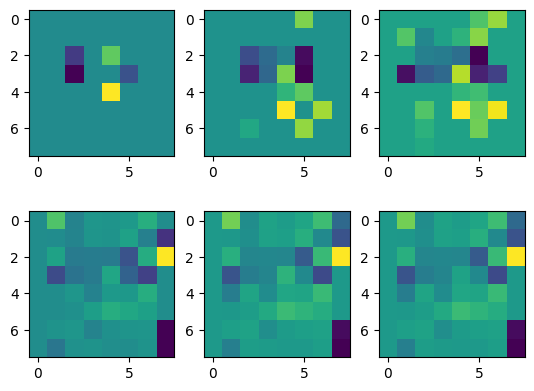

In [8]:
fig, axs = plt.subplots(2,3) 
axs[0,0].imshow(sol.T[4].T.reshape((8,8)))
axs[0,1].imshow(sol.T[14].T.reshape((8,8)))
axs[0,2].imshow(sol.T[24].T.reshape((8,8)))
axs[1,0].imshow(sol.T[49].T.reshape((8,8)))
axs[1,1].imshow(sol.T[74].T.reshape((8,8)))
axs[1,2].imshow(sol.T[99].T.reshape((8,8)))

These 6 images show us the feature map of $t = 5,15,25,50,75,100$ iterations. <br>
The purple areas help finding the $9$ and the yellow areas indicate the $3$.

The features in the earlier iterations fit quite well with our handpicked features from excersise 1. For the higher iterations the feature map seems to be focusing a bit more random and its error rate also rises again.